In [2]:
import pandas as pd
import json
import requests
import re
from pprint import pprint
from datetime import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Le déplacement d'un employé coûte 50 euros pour aller à la gare + 20 euros par machine. Les 4 machines sont dans la même gare.

Le prix de vente des boissons est de : 1 euro le café ; 1,60 euros le soda ; 1,80 euros le nrj drink.

Le coût de revient des boissons est de : 30 cts le café ; 60 cts le soda ; 80 cts le nrj drink.

Chaque distributeur a une capacité maximale de : 280 doses de café ; 120 canettes de soda ; 60 bouteilles de nrj drink.

La gare est fermée au public une partie de la nuit.

Le coût de location de l'emplacement pour chaque machine est de 150 euros mensuels.

Les frais d'entretien de chaque machine sont de 1200 euros annuels.

quantité max = 280 doses de café ; 120 canettes de soda ; 60 bouteilles de nrj drink.

marge : café = 0.7€, soda = 1€, nrj = 1€

In [3]:
link = ("https://raw.githubusercontent.com/murpi/wilddata/master/quests/beverage_dispenser.json")

In [4]:
r = requests.get(link)
if r.status_code == 200:
    data = json.loads(r.text)
else :
    print(r.status_code, r.reason)

In [5]:
pprint(data)

{'content': [{'date': '2019-11-14T11:53:35.000Z',
              'machine': 'A',
              'product': 'refill'},
             {'date': '2019-11-14T12:06:35.000Z',
              'machine': 'A',
              'product': 'coffee'},
             {'date': '2019-11-14T12:07:59.000Z',
              'machine': 'A',
              'product': 'soda'},
             {'date': '2019-11-14T12:13:45.000Z',
              'machine': 'A',
              'product': 'soda'},
             {'date': '2019-11-14T12:22:35.000Z',
              'machine': 'A',
              'product': 'coffee'},
             {'date': '2019-11-14T12:37:44.000Z',
              'machine': 'A',
              'product': 'soda'},
             {'date': '2019-11-14T12:47:09.000Z',
              'machine': 'B',
              'product': 'refill'},
             {'date': '2019-11-14T12:47:52.000Z',
              'machine': 'A',
              'product': 'coffee'},
             {'date': '2019-11-14T12:51:00.000Z',
              'machine': 'A'

In [6]:
data_1 = pd.json_normalize(data['content'])

In [7]:
data_1.head(5)

,date,product,machine
0,2019-11-14T11:53:35.000Z,refill,A
1,2019-11-14T12:06:35.000Z,coffee,A
2,2019-11-14T12:07:59.000Z,soda,A
3,2019-11-14T12:13:45.000Z,soda,A
4,2019-11-14T12:22:35.000Z,coffee,A


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     11042 non-null  object
 1   product  11042 non-null  object
 2   machine  11042 non-null  object
dtypes: object(3)
memory usage: 258.9+ KB


In [9]:
data_1.head()

,date,product,machine
0,2019-11-14T11:53:35.000Z,refill,A
1,2019-11-14T12:06:35.000Z,coffee,A
2,2019-11-14T12:07:59.000Z,soda,A
3,2019-11-14T12:13:45.000Z,soda,A
4,2019-11-14T12:22:35.000Z,coffee,A


In [10]:
# solution plus rapide :
# data_1['date'] = pd.to_datetime(data_1['date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [11]:
data_1['date']=data_1['date'].apply(lambda x :datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))


In [12]:
data_1['day']=data_1['date'].apply(lambda x: datetime.strftime(x, '%A'))

In [13]:
data_1['heure']=data_1['date'].apply(lambda x: datetime.strftime(x, '%H'))

In [14]:
data_1.pivot_table('date',index=['machine','day'], columns='product', aggfunc='count')

product            coffee    nrj  refill   soda
machine day                                    
A       Friday      486.0  104.0     NaN  234.0
        Monday      457.0   24.0     NaN  158.0
        Saturday    167.0  114.0     NaN   92.0
        Sunday      154.0   26.0     NaN  109.0
        Thursday    143.0   27.0     6.0  126.0
        Tuesday     273.0   26.0     NaN    1.0
        Wednesday     NaN   25.0     NaN    NaN
B       Friday      436.0   64.0     NaN  175.0
        Monday      439.0   45.0     NaN  180.0
        Saturday    189.0   67.0     NaN  120.0
        Sunday      187.0   44.0     NaN  120.0
        Thursday    128.0   46.0     6.0  104.0
        Tuesday     298.0   45.0     NaN   21.0
        Wednesday     3.0   42.0     NaN    NaN
C       Friday      580.0  156.0     NaN  286.0
        Monday      529.0    NaN     NaN   43.0
        Saturday    187.0  141.0     NaN  128.0
        Sunday      194.0   14.0     NaN  135.0
        Thursday     86.0   49.0     6.0  128.0
        Tuesday     104.0    NaN     NaN    NaN
D       Friday      502.0  124.0     NaN  263.0
        Monday      542.0   24.0     NaN  158.0
        Saturday    162.0  129.0     NaN  104.0
        Sunday      163.0   27.0     NaN  101.0
        Thursday     54.0   27.0     6.0   94.0
        Tuesday     257.0   17.0     NaN    NaN
        Wednesday     NaN   11.0     NaN    NaN

In [15]:
data_coffee = data_1[data_1['product']=='coffee']
data_soda = data_1[data_1['product']=='soda']
data_nrj = data_1[data_1['product']=='nrj']

In [16]:
data_coffee = data_coffee.reset_index(drop= True)
data_soda  = data_soda .reset_index(drop= True)
data_nrj = data_nrj.reset_index(drop= True)


Text(0.5, 1.0, 'Cumul vente coffee / H')

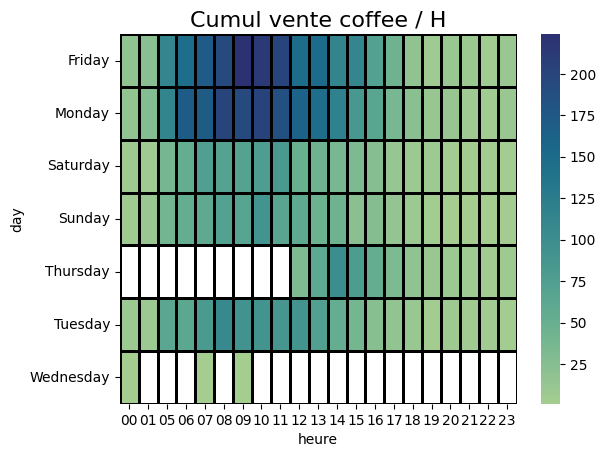

In [17]:
coffee = data_coffee.pivot_table( values="product", index='day', columns='heure', aggfunc='count')
# coffee.fillna(0,inplace=True)
ax = sns.heatmap(coffee, cmap="crest", linecolor='black',linewidths='1')
ax.set_title(f"Cumul vente coffee / H", size = 16)

Text(0.5, 1.0, 'Cumul vente soda / H')

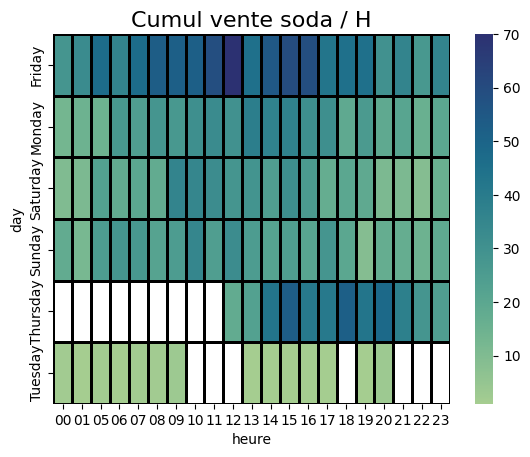

In [18]:
soda = data_soda.pivot_table( values="product", index='day', columns='heure', aggfunc='count')
# soda.fillna(0,inplace=True)
ax=sns.heatmap(soda, cmap="crest", linecolor='black',linewidths='1')
ax.set_title(f"Cumul vente soda / H", size = 16)

Text(0.5, 1.0, 'Cumul vente nrj / H')

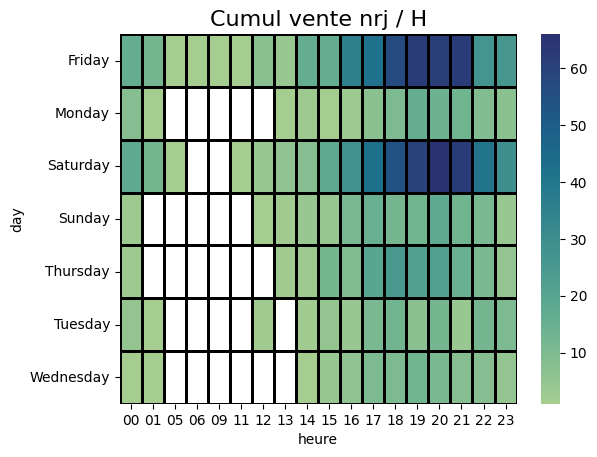

In [19]:
nrj = data_nrj.pivot_table( values="product", index='day', columns='heure', aggfunc='count')
# nrj.fillna(0,inplace=True)
ax = sns.heatmap(nrj, cmap="crest", linecolor='black',linewidths='1')
ax.set_title(f"Cumul vente nrj / H", size = 16)

In [20]:
liste_produit = ['refill','coffee', 'soda', 'nrj']

In [21]:
data_A = data_1[data_1['machine']=='A']
data_B = data_1[data_1['machine']=='B']
data_C = data_1[data_1['machine']=='C']
data_D = data_1[data_1['machine']=='D']

In [22]:
data_A = data_A.reset_index(drop= True)
data_B = data_B.reset_index(drop= True)
data_C = data_C.reset_index(drop= True)
data_D = data_D.reset_index(drop= True)


In [23]:
liste_machine = [data_A, data_B, data_C, data_D]

In [24]:
for x in liste_machine:
    x.insert(3,'total_coffee', value=0, allow_duplicates=False)
    x.insert(3,'total_soda', value=0, allow_duplicates=False)
    x.insert(3,'total_nrj', value=0, allow_duplicates=False)

In [25]:
liste_machine[0].head(20)

,date,product,machine,total_nrj,total_soda,total_coffee,day,heure
0,2019-11-14 11:53:35,refill,A,0,0,0,Thursday,11
1,2019-11-14 12:06:35,coffee,A,0,0,0,Thursday,12
2,2019-11-14 12:07:59,soda,A,0,0,0,Thursday,12
3,2019-11-14 12:13:45,soda,A,0,0,0,Thursday,12
4,2019-11-14 12:22:35,coffee,A,0,0,0,Thursday,12
5,2019-11-14 12:37:44,soda,A,0,0,0,Thursday,12
6,2019-11-14 12:47:52,coffee,A,0,0,0,Thursday,12
7,2019-11-14 12:51:00,coffee,A,0,0,0,Thursday,12
8,2019-11-14 12:52:49,coffee,A,0,0,0,Thursday,12
9,2019-11-14 12:55:16,coffee,A,0,0,0,Thursday,12


In [26]:
for x in liste_machine:
    for t in range(len(x)):    
            if x['product'][t] == 'refill':
                x['total_coffee'][t] = 280
                x['total_soda'][t] = 120
                x['total_nrj'][t] = 60
            elif x['product'][t] == 'coffee':
                x['total_coffee'][t] = x['total_coffee'][t-1] - 1
                x['total_soda'][t] = x['total_soda'][t-1]
                x['total_nrj'][t] = x['total_nrj'][t-1]
            elif x['product'][t] == 'soda':
                x['total_soda'][t] = x['total_soda'][t-1] - 1
                x['total_coffee'][t] = x['total_coffee'][t-1]
                x['total_nrj'][t] = x['total_nrj'][t-1]
            elif x['product'][t] == 'nrj':
                x['total_nrj'][t] = x['total_nrj'][t-1] - 1
                x['total_coffee'][t] = x['total_coffee'][t-1]
                x['total_soda'][t] = x['total_soda'][t-1]
            else:
                x['total_coffee'][t] = x['total_coffee'][t-1]
                x['total_soda'][t] = x['total_soda'][t-1]
                x['total_nrj'][t] = x['total_nrj'][t-1]




In [27]:
liste_machine[1].head(20)

,date,product,machine,total_nrj,total_soda,total_coffee,day,heure
0,2019-11-14 12:47:09,refill,B,60,120,280,Thursday,12
1,2019-11-14 13:01:09,coffee,B,60,120,279,Thursday,13
2,2019-11-14 13:03:46,coffee,B,60,120,278,Thursday,13
3,2019-11-14 13:11:52,coffee,B,60,120,277,Thursday,13
4,2019-11-14 13:44:06,coffee,B,60,120,276,Thursday,13
5,2019-11-14 13:51:00,coffee,B,60,120,275,Thursday,13
6,2019-11-14 14:00:15,coffee,B,60,120,274,Thursday,14
7,2019-11-14 14:11:06,coffee,B,60,120,273,Thursday,14
8,2019-11-14 14:20:13,coffee,B,60,120,272,Thursday,14
9,2019-11-14 14:22:53,coffee,B,60,120,271,Thursday,14


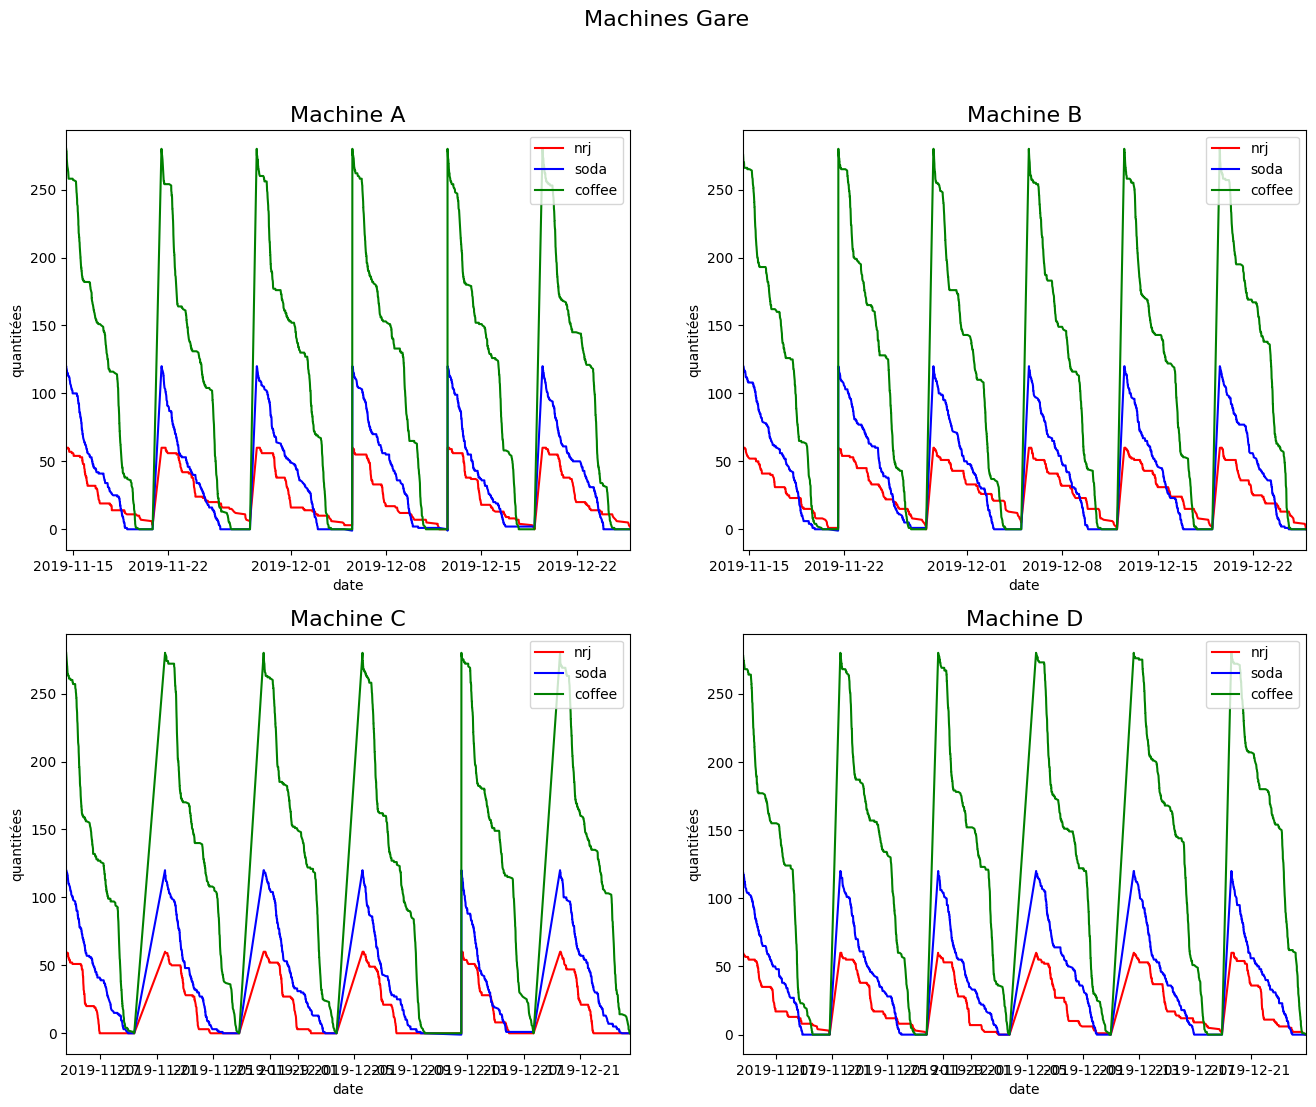

In [28]:
fig, ax = plt.subplots(figsize = (16,12), subplot_kw=dict(aspect="equal"))
fig.suptitle("Machines Gare", size = 16)
count = 1
machine = ["A","B","C","D"]
for x in liste_machine:
    ax = plt.subplot(220 + count)
    ax = sns.lineplot(data = x,
                    x = "date",
                    y = "total_nrj",
                    color = 'red',
                    label='nrj')
    ax = sns.lineplot(data = x,
                    x = "date",
                    y = "total_soda",
                    color = 'Blue',
                    label='soda')
    ax = sns.lineplot(data = x,
                    x = "date",
                    y = "total_coffee",
                    color = 'green',
                    label='coffee')
    ax.margins(0, 0.05)
    ax.set_title(f"Machine {machine[count-1]}", size = 16)
    plt.ylabel('quantitées')
    plt.xlabel("date")
    plt.legend(loc=1)
    count += 1
plt.show()

In [29]:
passage_D = []
passage_H = []
for x in range(len(liste_machine)):
    data_refill= liste_machine[x][liste_machine[x]['product']=='refill']
    data_nrj_0 = liste_machine[x].loc[(liste_machine[x]['total_nrj'] == 0) & (liste_machine[x]['product'] == 'nrj')]
    data_soda_0 = liste_machine[x][(liste_machine[x]['total_soda']==0) & (liste_machine[x]['product']=='soda')]
    data_coffee_0 = liste_machine[x][(liste_machine[x]['total_coffee']==0) & (liste_machine[x]['product']=='coffee')]
    liste_machine[x] = pd.concat([data_refill,data_coffee_0,data_nrj_0,data_soda_0])
    liste_machine[x] = liste_machine[x].sort_values('date')
    D = liste_machine[x]['day'][liste_machine[x]['product']!='refill'].min()
    H = liste_machine[x]['heure'][liste_machine[x]['product']!='refill'].min()
    passage_D.append(D)
    passage_H.append(H)

In [30]:
min(passage_D)

'Monday'

In [31]:
quantité_produit =[0, 280, 120 , 60]

In [32]:
marge_produit = [0, 0.7, 1, 1]

In [33]:
total_manque=[]
for l in range(4):
    liste_manque = []    
    for x in range(1,4):
        liste_rupture = []
        for r in range(len(liste_machine[l][liste_machine[l]['product']==liste_produit[x]])):
            rup = round((list(liste_machine[l]['date'][liste_machine[l]['product']==liste_produit[x]])[r] - list(liste_machine[l]['date'][liste_machine[l]['product']==liste_produit[0]])[r]) / np.timedelta64(1, 'D'),1)
            liste_rupture.append(rup)
        rupture = round(sum(liste_rupture)/len(liste_rupture),1)
        m = round((((quantité_produit[x]/rupture)*7)-quantité_produit[x])*marge_produit[x],2)
        if m > 0 :
            manque = m
        else:
            manque = 0
        liste_manque.append(manque)
        print(f"le {liste_produit[x]} de la machine {machine[l]} est en rupture en moyenne au bout de {rupture} jours")
        print(f'soit {quantité_produit[x]} {liste_produit[x]} vendu en {rupture} jours cela reviendrais à vendre environ {round((quantité_produit[x]/rupture)*7,)} par une semaine complète')
        print(f"soit un manque à gagner d'environ {manque}€")
        print("----")
    print(f"Pour la machine {machine[l]} vous avez un manque à gagner d'environ {round(sum(liste_manque),2)}€")
    total_manque.append(sum(liste_manque))
    print("_______///________")
print(f"Pour les 4 machines vous avez un manque à gagner total de {round(sum(total_manque),2)}€")
print(f"La premiere rupture se prooduit au plus tôt le {min(passage_D)} à {min(passage_H)}h00, je vous préconise de prevoir un passage au plus tôt en suivant !")



le coffee de la machine A est en rupture en moyenne au bout de 5.3 jours
soit 280 coffee vendu en 5.3 jours cela reviendrais à vendre environ 370 par une semaine complète
soit un manque à gagner d'environ 62.87€
----
le soda de la machine A est en rupture en moyenne au bout de 6.4 jours
soit 120 soda vendu en 6.4 jours cela reviendrais à vendre environ 131 par une semaine complète
soit un manque à gagner d'environ 11.25€
----
le nrj de la machine A est en rupture en moyenne au bout de 27.4 jours
soit 60 nrj vendu en 27.4 jours cela reviendrais à vendre environ 15 par une semaine complète
soit un manque à gagner d'environ 0€
----
Pour la machine A vous avez un manque à gagner d'environ 74.12€
_______///________
le coffee de la machine B est en rupture en moyenne au bout de 5.4 jours
soit 280 coffee vendu en 5.4 jours cela reviendrais à vendre environ 363 par une semaine complète
soit un manque à gagner d'environ 58.07€
----
le soda de la machine B est en rupture en moyenne au bout de 10